In [68]:
import pandas as pd
import numpy as np
import sklearn.manifold as sk_m
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("beer_reviews.csv")

In [3]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [113]:
df.shape

(1586614, 13)

In [4]:
beer_df = df[["review_overall", 
              "review_profilename", 
              "beer_beerid", 
              "beer_style", 
              "beer_name", 
              "brewery_name"]]

In [5]:
beer_df

,review_overall,review_profilename,beer_beerid,beer_style,beer_name,brewery_name
0,1.5,stcules,47986,Hefeweizen,Sausa Weizen,Vecchio Birraio
1,3.0,stcules,48213,English Strong Ale,Red Moon,Vecchio Birraio
2,3.0,stcules,48215,Foreign / Export Stout,Black Horse Black Beer,Vecchio Birraio
3,3.0,stcules,47969,German Pilsener,Sausa Pils,Vecchio Birraio
4,4.0,johnmichaelsen,64883,American Double / Imperial IPA,Cauldron DIPA,Caldera Brewing Company
...,...,...,...,...,...,...
1586609,5.0,maddogruss,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company
1586610,4.0,yelterdow,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company
1586611,4.5,TongoRad,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company
1586612,4.0,dherling,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company


In [6]:
beer_df=beer_df.dropna()

In [7]:
num_reviews = (beer_df
               .groupby("beer_beerid", as_index=False)
               .agg({"review_profilename": "count"})
               .rename(columns={"review_profilename": "num_reviews"}))

In [8]:
num_reviews

,beer_beerid,num_reviews
0,3,3
1,4,10
2,5,424
3,6,877
4,7,659
...,...,...
66035,77313,1
66036,77314,1
66037,77315,1
66038,77316,1


In [9]:
num_reviews.describe()

,beer_beerid,num_reviews
count,66040.000000,66040.000000
mean,39716.687250,24.019549
std,22414.987761,110.847551
min,3.000000,1.000000
25%,20503.750000,1.000000
50%,40503.500000,2.000000
75%,59201.250000,7.000000
max,77317.000000,3289.000000


In [10]:
beer_df = beer_df.merge(num_reviews, how="inner", on="beer_beerid")

In [11]:
beer_df

,review_overall,review_profilename,beer_beerid,beer_style,beer_name,brewery_name,num_reviews
0,1.5,stcules,47986,Hefeweizen,Sausa Weizen,Vecchio Birraio,1
1,3.0,stcules,48213,English Strong Ale,Red Moon,Vecchio Birraio,1
2,3.0,stcules,48215,Foreign / Export Stout,Black Horse Black Beer,Vecchio Birraio,1
3,3.0,stcules,47969,German Pilsener,Sausa Pils,Vecchio Birraio,1
4,4.0,johnmichaelsen,64883,American Double / Imperial IPA,Cauldron DIPA,Caldera Brewing Company,1
...,...,...,...,...,...,...,...
1586246,5.0,maddogruss,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company,14
1586247,4.0,yelterdow,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company,14
1586248,4.5,TongoRad,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company,14
1586249,4.0,dherling,33061,Pumpkin Ale,The Horseman's Ale,The Defiant Brewing Company,14


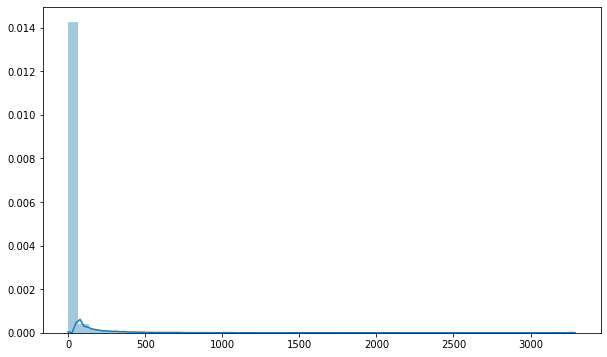

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(num_reviews.set_index("beer_beerid"));

In [13]:
final_beers = beer_df[beer_df["num_reviews"] >= 7].copy()

In [14]:
final_beers.head()

,review_overall,review_profilename,beer_beerid,beer_style,beer_name,brewery_name,num_reviews
5,3.0,oline73,52159,Herbed / Spiced Beer,Caldera Ginger Beer,Caldera Brewing Company,9
6,3.5,Reidrover,52159,Herbed / Spiced Beer,Caldera Ginger Beer,Caldera Brewing Company,9
7,3.0,alpinebryant,52159,Herbed / Spiced Beer,Caldera Ginger Beer,Caldera Brewing Company,9
8,4.0,LordAdmNelson,52159,Herbed / Spiced Beer,Caldera Ginger Beer,Caldera Brewing Company,9
9,4.5,augustgarage,52159,Herbed / Spiced Beer,Caldera Ginger Beer,Caldera Brewing Company,9


In [39]:
beer_specs=final_beers.copy()
beer_specs.drop("review_profilename",axis=1)
beer_specs=beer_specs.groupby("beer_beerid").agg({"review_overall":"mean",
                                                  "beer_style":"first",
                                                  "beer_name":"first",
                                                  "brewery_name":"first",
                                                  "num_reviews":"first"}).reset_index()


In [40]:
beer_specs

,beer_beerid,review_overall,beer_style,beer_name,brewery_name,num_reviews
0,4,3.700000,American Stout,Wildcatter's Crude Stout,Yellow Rose Brewing Company,10
1,5,3.549528,Vienna Lager,Amber,Abita Brewing Co.,424
2,6,3.706956,English Brown Ale,Turbodog,Abita Brewing Co.,877
3,7,3.266313,Fruit / Vegetable Beer,Purple Haze,Abita Brewing Co.,659
4,8,3.647059,American Adjunct Lager,Wheat,Abita Brewing Co.,68
...,...,...,...,...,...,...
17875,76816,4.030000,Rye Beer,Sierra Nevada Ruthless Rye IPA,Sierra Nevada Brewing Co.,50
17876,76874,4.272727,Belgian Strong Dark Ale,Unibroue 17 Grande Réserve,Unibroue,11
17877,76886,3.571429,Czech Pilsener,Nomad,Great Divide Brewing Company,7
17878,76892,3.812500,American Black Ale,Alaskan Black IPA,Alaskan Brewing Co.,8


In [149]:
df.to_csv("beer_specs.csv")

In [15]:
beer_features = final_beers.pivot_table(index="beer_beerid",
                                         columns="review_profilename",
                                         values="review_overall")

In [16]:
beer_features= beer_features.fillna(0)

In [72]:
with open("beer_reviews.pkl", "wb") as bf:
    pickle.dump(beer_features, bf, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
beer_features

review_profilename,0110x011,01Ryan10,02maxima,03SVTCobra,04101Brewer,05Harley,0Naught0,0beerguy0,0runkp0s,0to15,...,zutmin,zwalk8,zwan,zwoehr,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beer_beerid,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model

In [18]:
from scipy.sparse import csr_matrix

In [19]:
matrix_beer_features = csr_matrix(beer_features)

In [20]:
from sklearn.neighbors import NearestNeighbors

In [21]:
model_knn = NearestNeighbors(n_neighbors=5, 
                             metric="euclidean",
                             algorithm="brute",
                             n_jobs=-1)
model_knn.fit(matrix_beer_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_jobs=-1)

# User Friendly

In [ ]:
distances, indices = model_knn.kneighbors(beer_features.loc[10].values.reshape(1, -1), n_neighbors=6)
distances, indices

In [ ]:
beerid_to_vector(4)

In [ ]:
display_recommendations(model_knn.kneighbors(beerid_to_vector(76896), n_neighbors=6))

In [140]:
def display_recommendations(knn_output):
    distances, indices = knn_output    
    for i, res in enumerate(zip(distances.flatten(), indices.flatten())):
        distance, index = res
        beer_type = beer_specs.iloc[index]
        if i == 0:
            print(f"Recommendations for {beer_type['beer_name']}:")
            print("-----------------------------------------\n")
        else:
            print(f"-{i}-\n ~{beer_type['beer_name']}~\n\
            Style:       {beer_type['beer_style']}\n\
            Brewery:     {beer_type['brewery_name']}\n\
            Reviews:     [{beer_type['num_reviews']}]\n\
            Avg Score:   {round(beer_type['review_overall'],1)}\n")

In [24]:
def beerid_to_vector(beer_beerid):
    return beer_features.loc[beer_beerid].values.reshape(1, -1)

In [53]:
beer_style_id_dict={beer_name: beer_beerid for beer_beerid, beer_name in beer_specs.set_index("beer_beerid").to_dict()["beer_name"].items()}

In [26]:
def find_beerid(query):
    if query in beer_style_id_dict.keys():
        return beer_style_id_dict[query]
    else:
        return "Sorry, could not find your beer name."

In [34]:
def beer_recommender(query, n=5):
    beerid = find_beerid(query)
    try:
        beerid_vec= beerid_to_vector(beerid)
    except:
        return 'Not available beer name in the list'
    
    n_recs = n + 1
    recs = model_knn.kneighbors(beerid_vec, n_neighbors=n_recs)
    display_recommendations(recs)

In [167]:
beer_style_id_dict

{"Wildcatter's Crude Stout": 4,
 'Amber': 61798,
 'Turbodog': 6,
 'Purple Haze': 20170,
 'Wheat': 51673,
 'Golden': 9,
 'Allagash Dubbel Ale': 10,
 "Bert Grant's Scottish Ale": 11,
 "Bert Grant's Imperial Stout": 12,
 "Bert Grant's IPA": 13,
 'Witkap Pater Singel / Stimulo': 14,
 'Wild Goose Snow Goose Winter Ale': 15,
 'Hop Jack Pale Ale': 16,
 'Widmer Hefeweizen': 17,
 'Sommerbräu': 18,
 'Mackeson Triple XXX Stout': 19,
 'Old Izaak': 20,
 'Deep Shaft Stout': 21,
 'Wachusett IPA (India Pale Ale)': 23,
 'Wachusett Black Shack Porter': 24,
 'Wachusett Octoberfest Ale': 26,
 "Quinn's Amber Ale": 27,
 "Peter's Brand Pilsner Beer": 29,
 'Trois Pistoles': 30,
 'Blanche De Chambly': 31,
 'Eau Benite': 32,
 'Maudite': 33,
 'La Fin Du Monde': 34,
 'Twisted Pine Amber Ale': 35,
 'Traquair House Ale': 36,
 'Burnham Pilsner': 38,
 'Alpha King Pale Ale': 39,
 'Three Floyds Extra Pale Ale': 40,
 'Light Lager': 12562,
 'Dark Ale': 9023,
 'Rebellion Lager': 43,
 'Lager': 28949,
 'Tremont Summer Ale':

In [178]:
beer_recommender("Miller Lite")

Recommendations for Miller Lite:
-----------------------------------------

-1-
 ~Miller Genuine Draft Light 64~
            Style:       Light Lager
            Brewery:     Miller Brewing Co.
            Reviews:     [211]
            Avg Score:   2.6

-2-
 ~Bud Ice~
            Style:       American Adjunct Lager
            Brewery:     Anheuser-Busch
            Reviews:     [256]
            Avg Score:   2.4

-3-
 ~Michelob Light~
            Style:       Light Lager
            Brewery:     Anheuser-Busch
            Reviews:     [204]
            Avg Score:   2.7

-4-
 ~Milwaukee's Best Light~
            Style:       Light Lager
            Brewery:     Miller Brewing Co.
            Reviews:     [151]
            Avg Score:   2.6

-5-
 ~Natural Ice~
            Style:       American Adjunct Lager
            Brewery:     Anheuser-Busch
            Reviews:     [286]
            Avg Score:   2.3

